In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

from matplotlib import gridspec
from mpl_toolkits.axes_grid.axislines import SubplotZero
from mpl_toolkits.mplot3d import Axes3D

plt.xkcd()

from IPython.display import HTML

HTML("""
<style>
.toggle_box {
    position: fixed;
    align: center;
    padding: 2px;
    top: 17%;
    left: 94%;
    opacity: 0.6;
    z-index: 10000;
}
.toggle_button {
    padding: 1px 3px 0 1px;
}
</style>

<script>
var code_show = true;

function code_toggle() {
  if (code_show) {
    $('div.input').hide('linear');
    $('img#code-toggle')
      .attr('src', 'assets/expand.png')
      .attr('title', 'click to display code cells');
  } else {
    $('div.input').show('linear');
    $('img#code-toggle')
      .attr('src', 'assets/collapse.png')
      .attr('title', 'click to hide code cells');
  }
  code_show = !code_show;
}
</script>

<div class='toggle_box'>
  <button class='toggle_button' onclick='javascript:code_toggle()'>
    <img id='code-toggle' src='assets/collapse.png' title='click to hide code cells'/>
  </button>
</div>""")

In [2]:
data = pd.read_csv('data/ex1data1.txt',
                   header=None,
                   names=['x', 'y'])

print('{} rows, {} columns\n'.format(*data.shape))
print('Here are the first 10 rows:\n{}'.format(data.head(10)))

97 rows, 2 columns

Here are the first 10 rows:
        x        y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
5  8.3829  11.8860
6  7.4764   4.3483
7  8.5781  12.0000
8  6.4862   6.5987
9  5.0546   3.8166


In [3]:
print('{}'.format(data.describe()))

               x          y
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


In [4]:
data.y.size

97

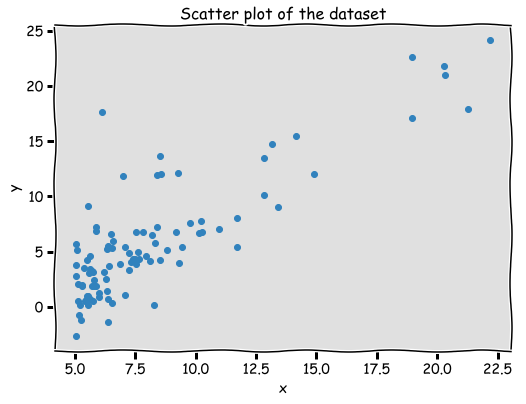

In [5]:
plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])
graph0 = plt.subplot(gs[0])
graph0.scatter(data.x, data.y, color='#3182bd')
graph0.set_xlabel('x', fontsize=14)
graph0.set_ylabel('y', fontsize=14)
graph0.set_title(r'Scatter plot of the dataset', fontsize=16)
graph0.set_facecolor('0.88')

In [6]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    
    m = X.shape[0]
    
    y_hat = np.dot(X, theta.T).sum(axis=1)
    
    cost = (1. / (2*m)) * np.square(y_hat - y).sum()
    
    return cost


In [7]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    
    m = X.shape[0]
    
    y_hat = np.dot(X, theta.T).sum(axis=1)
    err = (y_hat - y).ravel()
    
    deriv_0 = (1./m) * np.multiply(err, X[:, 0]).sum()
    deriv_1 = (1./m) * np.multiply(err, X[:, 1]).sum()
    
    return deriv_0, deriv_1


In [8]:
NUM_ITERS = 1000    # number of iterations for gradient descent
ALPHA = 1e-2        # step size scaling

def gradient_descent(theta, X, y):
    m = X.shape[0]
    
    cost_history = np.zeros(shape=(NUM_ITERS, 1))
    
    theta_history = np.zeros(shape=(NUM_ITERS, 2))
    
    for i in range(NUM_ITERS):
        deriv_0, deriv_1 = gradient(theta, X, y)
        
        theta[0] -= ALPHA * deriv_0
        theta[1] -= ALPHA * deriv_1
        
        theta_history[i,0] = theta[0]
        theta_history[i,1] = theta[1]
        
        cost_history[i,0] = cost(theta, X, y)
        
    return theta, cost_history, theta_history


In [9]:
# prepare training data, add bias column
X = data.values[:,0:1]
X = np.insert(X, 0, np.ones(X.shape[1]), axis=1)

y = data.values[:,1:2]

theta = np.zeros(2)

# here are the first 5 rows of the training data
print(X[0:5,:])


[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]]


In [10]:
print('With the following initial θ values:')
print(r'θ₀ (y-intercept): {}'.format(theta[0]))
print(r'θ₁ (slope): {}'.format(theta[1]))
print('initial cost = {}'.format(cost(theta, X, y)))


With the following initial θ values:
θ₀ (y-intercept): 0.0
θ₁ (slope): 0.0
initial cost = 32.072733877455676


In [11]:
theta, cost_history, theta_history = gradient_descent(theta, X, y)

print('After {} iterations of gradient descent:'.format(NUM_ITERS))
print(r'θ₀ (y-intercept): {}'.format(theta[0]))
print(r'θ₁ (slope): {}'.format(theta[1]))
print('initial cost = {}'.format(cost(theta, X, y)))


After 1000 iterations of gradient descent:
θ₀ (y-intercept): -3.2414021442744216
θ₁ (slope): 1.1272942024281842
initial cost = 4.515955503078912


In [12]:
# predict y value for x = 3.5 (adding in bias node value +1)
predict1 = np.array([1, 3.5]).dot(theta)
print('For x = 3.5, our model predict y = {}'.format(predict1))


For x = 3.5, our model predict y = 0.7041275642242231


In [13]:
# predict y value for x = 7.0 (adding in bias node value +1)
predict2 = np.array([1, 7.0]).dot(theta)
print('For x = 7.0, our model predict y = {}'.format(predict2))


For x = 7.0, our model predict y = 4.649657272722868


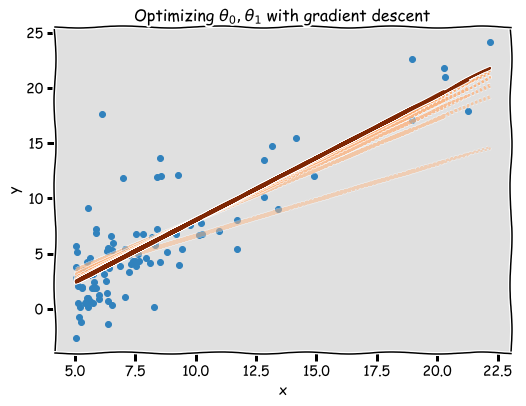

In [14]:
fx = theta_history[:,0]
fb = theta_history[:,1]

colseq = ['#fd8d3c', '#f16913', '#d94801', '#a63603', '#7f2704']

plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])

# scatter plot
graph0 = plt.subplot(gs[0])
graph0.scatter(X[:,1:2], y, color='#3182bd')

for e in zip([0, 200, 400, 600, 800], [0.3, 0.4, 0.5, 0.6, 0.7]):
    i, a = e
    graph0.plot(data.values[:, 0:1],
                X.dot([fx[i], fb[i]]).flatten(),
                color=colseq[0],
                alpha=a,
                ls=':')

result = X.dot(theta).flatten()
graph0.plot(data.values[:,0:1], result, color='#7f2704')

graph0.set_xlabel(r'x', fontsize=14)
graph0.set_ylabel(r'y', fontsize=14)
graph0.set_title(r'Optimizing $\theta_0, \theta_1$ with gradient descent',
                 fontsize=16)
graph0.set_facecolor('0.88')


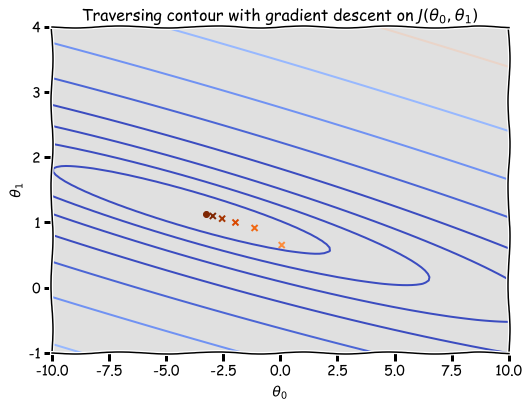

In [15]:
plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros(shape=(theta0_vals.size, theta1_vals.size))

for t1, e1 in enumerate(theta0_vals):
    for t2, e2 in enumerate(theta1_vals):
        thetaT = np.zeros(2)
        thetaT[0] = e1
        thetaT[1] = e2
        J_vals[t1,t2] = cost(thetaT, X,  y)

J_vals = J_vals.T

graph1 = plt.subplot(gs[0])

levels = np.logspace(-2, 3, 20).size
colormap = plt.cm.get_cmap('coolwarm', levels-1)

plt.contour(theta0_vals,
            theta1_vals,
            J_vals,
            np.logspace(-2, 3, 20),
            cmap=colormap)

graph1.set_xlabel(r'$\theta_0$', fontsize=14)
graph1.set_ylabel(r'$\theta_1$', fontsize=14)
graph1.scatter(fx[0::200], fb[0::200], marker='x', c=colseq)
graph1.scatter(theta[0], theta[1], color='#7f2704')
graph1.set_title(r'Traversing contour with gradient descent on $J(\theta_0,\theta_1)$',
                 fontsize=16)
graph1.set_facecolor('0.88')


In [16]:
from scipy.optimize import minimize

res = minimize(cost,
               np.zeros(2),
               args=(X,y),
               method='TNC',
               jac=gradient)

print('Using scipy.optimize.minimize(method="TNC") function:')
print(r'θ₀ (y-intercept): {}'.format(res.x[0]))
print(r'θ₁ (slope): {}'.format(res.x[1]))
print('cost = {}'.format(cost(res.x, X, y)))

Using scipy.optimize.minimize(method="TNC") function:
θ₀ (y-intercept): -3.8957806990210218
θ₁ (slope): 1.1930336281990377
cost = 4.4769713759751815


In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X[:, 1:2], y)

theta0 = lr.intercept_.flatten()[0]
theta1 = lr.coef_.flatten()[0]

print('Using sklearn.linear_mode.LinearRegression:')
print(r'θ₀ (y-intercept): {}'.format(theta0.item()))
print(r'θ₁ (slope): {}'.format(theta1))
print('cost = {}'.format(cost([theta0, theta1], X, y)))


Using sklearn.linear_mode.LinearRegression:
θ₀ (y-intercept): -3.8957808783118537
θ₁ (slope): 1.193033644189594
cost = 4.476971375975179


In [18]:
gramian = np.linalg.inv(np.dot(X.T, X))
moment = np.dot(X.T, y)

mpp_theta = np.dot(gramian, moment)

print('Using OLS (Moore-Penrose pseudoinverse):')
print(r'θ₀ (y-intercept): {}'.format(mpp_theta[0].item()))
print(r'θ₁ (slope): {}'.format(mpp_theta[1].item()))
print('cost = {}'.format(cost(mpp_theta.reshape((2)), X, y)))


Using OLS (Moore-Penrose pseudoinverse):
θ₀ (y-intercept): -3.895780878311868
θ₁ (slope): 1.1930336441895961
cost = 4.476971375975179


----